In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

from keras.utils import np_utils

%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
print(data.head())

   SRC_ADD  DES_ADD  PKT_ID  FROM_NODE  TO_NODE PKT_TYPE  PKT_SIZE    FLAGS  \
0     3.00    24.30  389693         21       23      tcp      1540  -------   
1    15.00    24.15  201196         23       24      tcp      1540  -------   
2    24.15    15.00   61905         23       22      ack        55  -------   
3    24.90     9.00  443135         23       21      ack        55  -------   
4    24.80     8.00  157335         23       21      ack        55  -------   

   FID  SEQ_NUMBER    ...        PKT_RATE  BYTE_RATE PKT_AVG_SIZE UTILIZATION  \
0    4       11339    ...      328.240918   505490.0       1540.0    0.236321   
1   16        6274    ...      328.205808   505437.0       1540.0    0.236337   
2   16        1930    ...      328.206042    18051.3         55.0    0.008441   
3   10       12670    ...      328.064183    18043.5         55.0    0.008437   
4    9        4901    ...      328.113525    18046.2         55.0    0.008438   

   PKT_DELAY  PKT_SEND_TIME  PKT_RESEV

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116ab4eb8>,
      dtype=object)

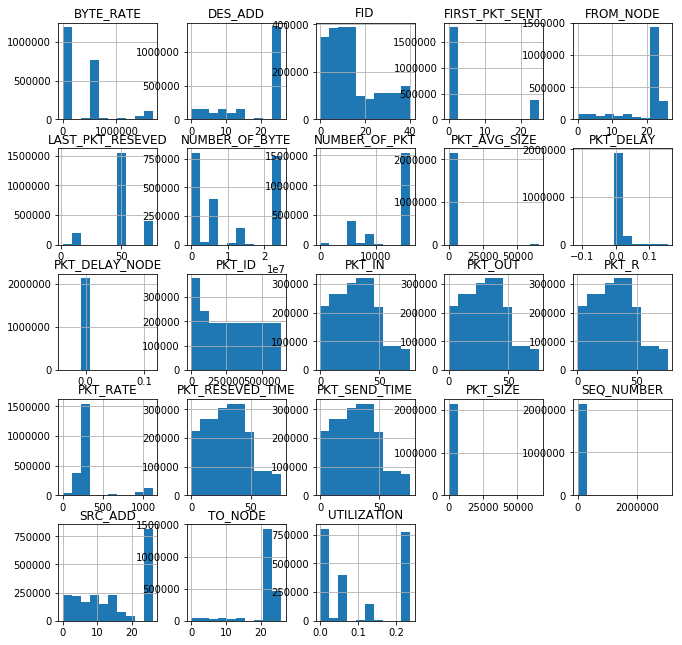

In [91]:
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [10]:
dummy_pkt_type = pd.get_dummies(data['PKT_TYPE'])
data = pd.concat([data, dummy_pkt_type], axis = 1)

dummy_flags = pd.get_dummies(data['FLAGS'])
data = pd.concat([data, dummy_flags], axis = 1)

data.drop("NODE_NAME_FROM",axis=1,inplace=True)
data.drop("NODE_NAME_TO",axis=1,inplace=True)

KeyError: 'PKT_TYPE'

In [7]:
data.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_SIZE',
       'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT', 'NUMBER_OF_BYTE', 'PKT_IN',
       'PKT_OUT', 'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE',
       'PKT_AVG_SIZE', 'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME',
       'PKT_RESEVED_TIME', 'FIRST_PKT_SENT', 'LAST_PKT_RESEVED', 'PKT_CLASS',
       'ack', 'cbr', 'ping', 'tcp', '-------', '---A---'],
      dtype='object')

In [8]:
features = ['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_SIZE',
       'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT', 'NUMBER_OF_BYTE', 'PKT_IN',
       'PKT_OUT', 'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE',
       'PKT_AVG_SIZE', 'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME',
       'PKT_RESEVED_TIME', 'FIRST_PKT_SENT', 'LAST_PKT_RESEVED',
       'ack', 'cbr', 'ping', 'tcp', '-------', '---A---']
X = data[features].values
Y = data['PKT_CLASS']

print(X.shape)
print(Y.shape)

(2160668, 29)
(2160668,)


In [46]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
standardised_X = scalar.transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [64]:
# for feature in standardised_X:
# arr = np.histogram(standardised_X[:,14], bins='auto')
# print(standardised_X[:,14])
# plt.pyplot.hist(arr)

In [66]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [69]:
# hot_encoded_Y = np_utils.to_categorical(encoded_Y)